In [2]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'chest-xray-pneumonia:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F17810%2F23812%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240217%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240217T051057Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D33a85c649cc17013923edab33a9687d8ba2cec3b16f616670a6f181be7f3f79948d89ba10f23101421cea9bf1eb93b16f1706a5d33e770c61c09762e07599d0084908f06a96ace0e4e66d0b3bda8870671855ff36858a517acb41eea74cd6de25390826bf847292e7edad0af07332e3ed941f2e9bb68f753b55ac1fd0fa881a41ce209f8900a5362a6c51f89c026ca64610e937356948302f546083c17bc89d4cc3e1e043c95e35162cbc1984a7ba506548b70c8c102e8e1468ab80d39f4b1d1630db7fa676810114ac6c087d131b83718cea7771e1a94b48a16d7de954cceb416b1903c8ac8e2cbfe59487cdd476b1cc50089c083abfeb345bba6514aebbf28,labeled-chest-xray-images:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F835414%2F1426603%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240217%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240217T051057Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D6de7dcea419f96f5ef11c04321a62e30fd25b76838868276695194c4aeab08b75a16f4ce0ea13a481d1c59b55bc96da1f2bb790760d1121734938ab281e2b47c0733d3015e822735d8a8e40ebf81373c999e451bb7f551fb1c117737b593b8e7dfeac24de0e8582e455bc1ce64acc670bc24d2e4578086ab8490b746ee811c45a9b63921f200b699f0682ff93b1774e765ea98b7088df4756b52b5b79abd11be363f67aa3b53d852ff5c519d271c2b750a35fb893ceb40260e191d2dfda5a639088de74dec58993f440f7455af88fa85f72d3a75c54d7607520b93d12b49315420a81309dc2b564310ea4b52fa05639399f068325f88a54b5cef69cd91c3bb3e'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 2463365435 bytes downloaded
Downloaded and uncompressed: chest-xray-pneumonia
[==================================================] 1257855648 bytes downloaded
Downloaded and uncompressed: labeled-chest-xray-images
Data source import complete.


This dataset contains 5,856 validated Chest X-Ray images. The images are split into a training set and a testing set of independent patients. Images are labeled as (disease:NORMAL/BACTERIA/VIRUS)-(randomized patient ID)-(image number of a patient).

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.bold text **bold text**

In [3]:
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

pd.options.display.max_colwidth = 100

import random
import os

from numpy.random import seed
seed(42)

random.seed(42)
os.environ['PYTHONHASHSEED'] = str(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import glob
import cv2

from tensorflow.random import set_seed
set_seed(42)

import warnings
warnings.filterwarnings('ignore')

In [4]:
IMG_SIZE = 224
BATCH = 32
SEED = 42

In [5]:
#main_path = "../input/chest-xray-pneumonia/chest_xray/"
main_path = "../input/labeled-chest-xray-images/chest_xray"


train_path = os.path.join(main_path,"train")
test_path=os.path.join(main_path,"test")

train_normal = glob.glob(train_path+"/NORMAL/*.jpeg")
train_pneumonia = glob.glob(train_path+"/PNEUMONIA/*.jpeg")

test_normal = glob.glob(test_path+"/NORMAL/*.jpeg")
test_pneumonia = glob.glob(test_path+"/PNEUMONIA/*.jpeg")

In [6]:
train_list = [x for x in train_normal]
train_list.extend([x for x in train_pneumonia])

df_train = pd.DataFrame(np.concatenate([['Normal']*len(train_normal) , ['Pneumonia']*len(train_pneumonia)]), columns = ['class'])
df_train['image'] = [x for x in train_list]

test_list = [x for x in test_normal]
test_list.extend([x for x in test_pneumonia])

df_test = pd.DataFrame(np.concatenate([['Normal']*len(test_normal) , ['Pneumonia']*len(test_pneumonia)]), columns = ['class'])
df_test['image'] = [x for x in test_list]

In [7]:
df_train

class  \
0        Normal   
1        Normal   
2        Normal   
3        Normal   
4        Normal   
...         ...   
5227  Pneumonia   
5228  Pneumonia   
5229  Pneumonia   
5230  Pneumonia   
5231  Pneumonia   

                                                                                         image  
0          ../input/labeled-chest-xray-images/chest_xray/train/NORMAL/NORMAL-4994733-0001.jpeg  
1          ../input/labeled-chest-xray-images/chest_xray/train/NORMAL/NORMAL-3178986-0002.jpeg  
2          ../input/labeled-chest-xray-images/chest_xray/train/NORMAL/NORMAL-7852398-0001.jpeg  
3          ../input/labeled-chest-xray-images/chest_xray/train/NORMAL/NORMAL-4092650-0002.jpeg  
4           ../input/labeled-chest-xray-images/chest_xray/train/NORMAL/NORMAL-996167-0001.jpeg  
...                                                                                        ...  
5227  ../input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-9530903-0002.jpeg  
5228      ../input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/VIRUS-324273-0008.jpeg  
5229  ../input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-5510638-0007.jpeg  
5230  ../input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-6383526-0001.jpeg  
5231  ../input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-6076468-0011.jpeg  

[5232 rows x 2 columns]

In [8]:
df_test

class  \
0       Normal   
1       Normal   
2       Normal   
3       Normal   
4       Normal   
..         ...   
619  Pneumonia   
620  Pneumonia   
621  Pneumonia   
622  Pneumonia   
623  Pneumonia   

                                                                                       image  
0          ../input/labeled-chest-xray-images/chest_xray/test/NORMAL/NORMAL-630880-0001.jpeg  
1         ../input/labeled-chest-xray-images/chest_xray/test/NORMAL/NORMAL-6332708-0002.jpeg  
2          ../input/labeled-chest-xray-images/chest_xray/test/NORMAL/NORMAL-857568-0001.jpeg  
3         ../input/labeled-chest-xray-images/chest_xray/test/NORMAL/NORMAL-3117193-0001.jpeg  
4         ../input/labeled-chest-xray-images/chest_xray/test/NORMAL/NORMAL-6322108-0001.jpeg  
..                                                                                       ...  
619  ../input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/BACTERIA-5155977-0005.jpeg  
620  ../input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/BACTERIA-2429208-0001.jpeg  
621  ../input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/BACTERIA-4059589-0004.jpeg  
622  ../input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/BACTERIA-4161430-0003.jpeg  
623     ../input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/VIRUS-3915569-0001.jpeg  

[624 rows x 2 columns]

**Let's check the target distribution on each set**

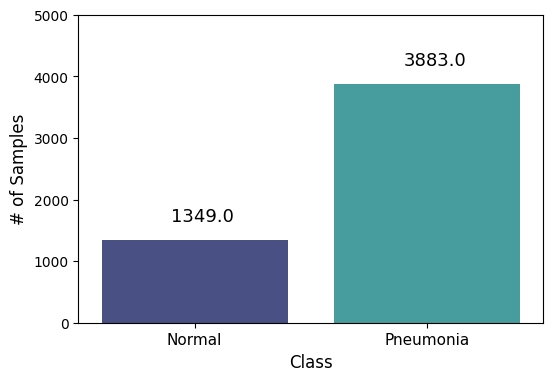

In [9]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x='class', data=df_train, palette="mako")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("# of Samples", fontsize= 12)
plt.ylim(0,5000)
plt.xticks([0,1], ['Normal', 'Pneumonia'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300), fontsize = 13)

plt.show()

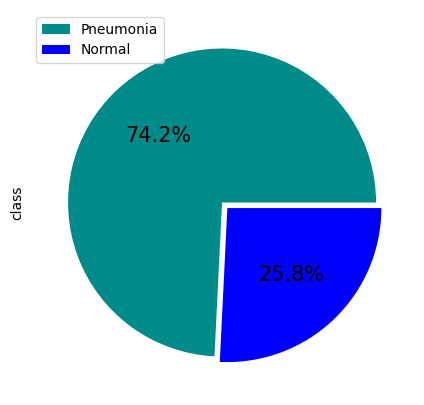

In [10]:
plt.figure(figsize=(7,5))

df_train['class'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['darkcyan','blue'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['Pneumonia', 'Normal'])
plt.show()

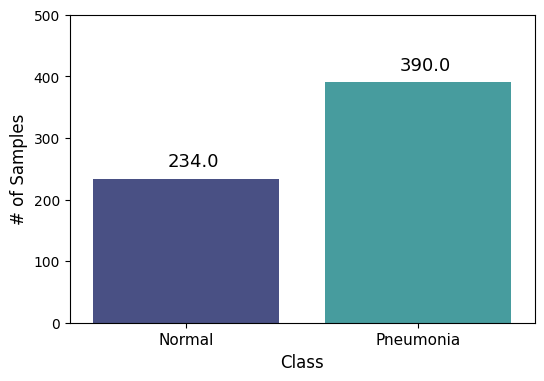

In [11]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x='class', data=df_test, palette="mako")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("# of Samples", fontsize= 12)
plt.ylim(0,500)
plt.xticks([0,1], ['Normal', 'Pneumonia'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+20), fontsize = 13)

plt.show()

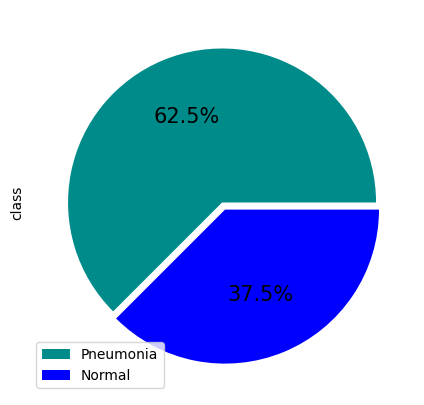

In [12]:
plt.figure(figsize=(7,5))

df_test['class'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['darkcyan','blue'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['Pneumonia', 'Normal'])
plt.show()

**The distributions from these datasets are a little different from each other. Both are slightly imbalanced, having more samples from the positive class (Pneumonia), with the training set being a little more imbalanced.

Before we move on to the next section, we will take a look at a few examples from each dataset.**

Train Set - Normal


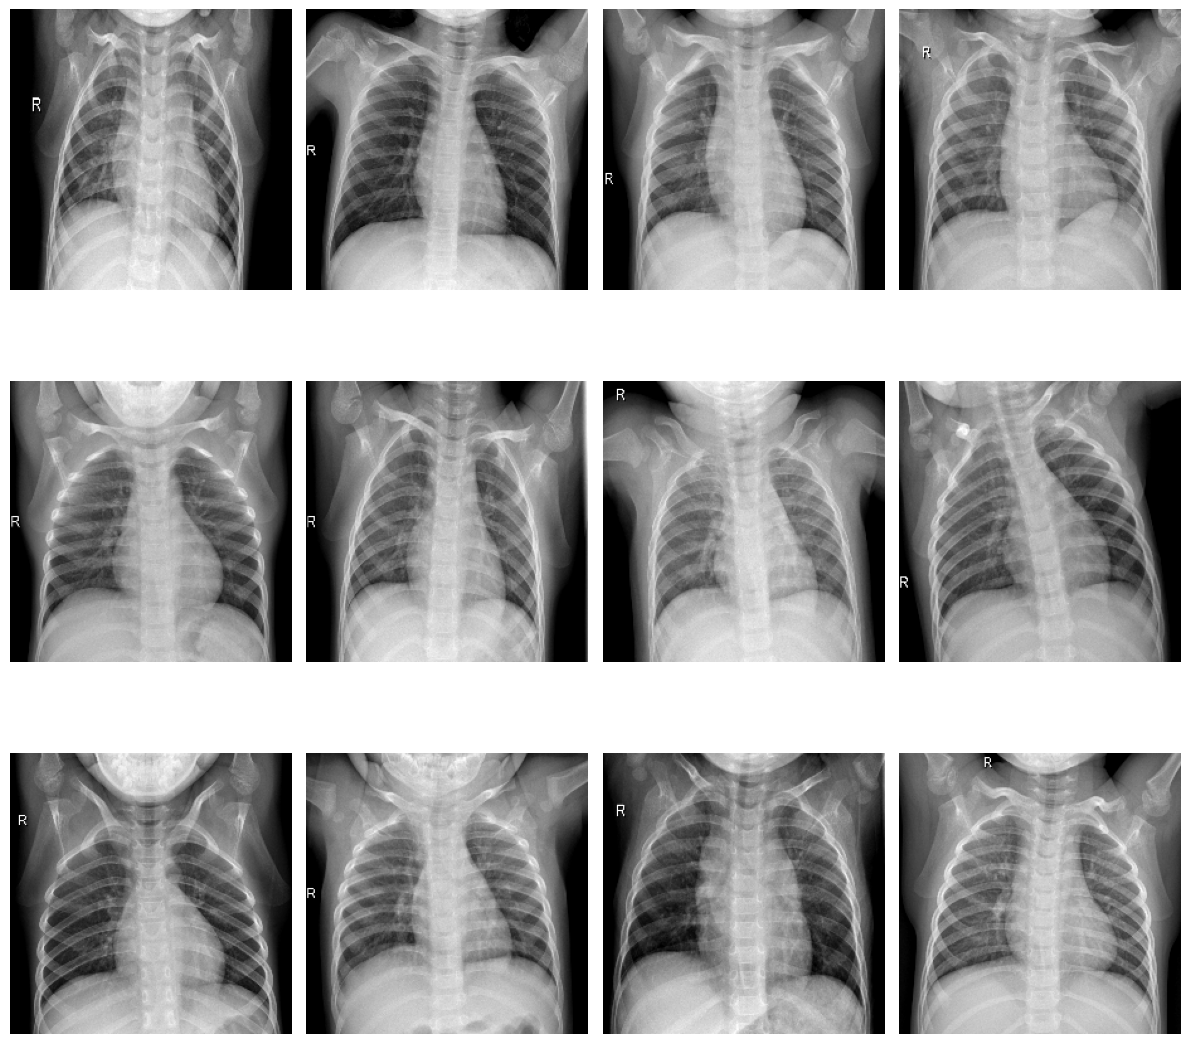

In [13]:
print('Train Set - Normal')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_normal[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Train Set - Pneumonia


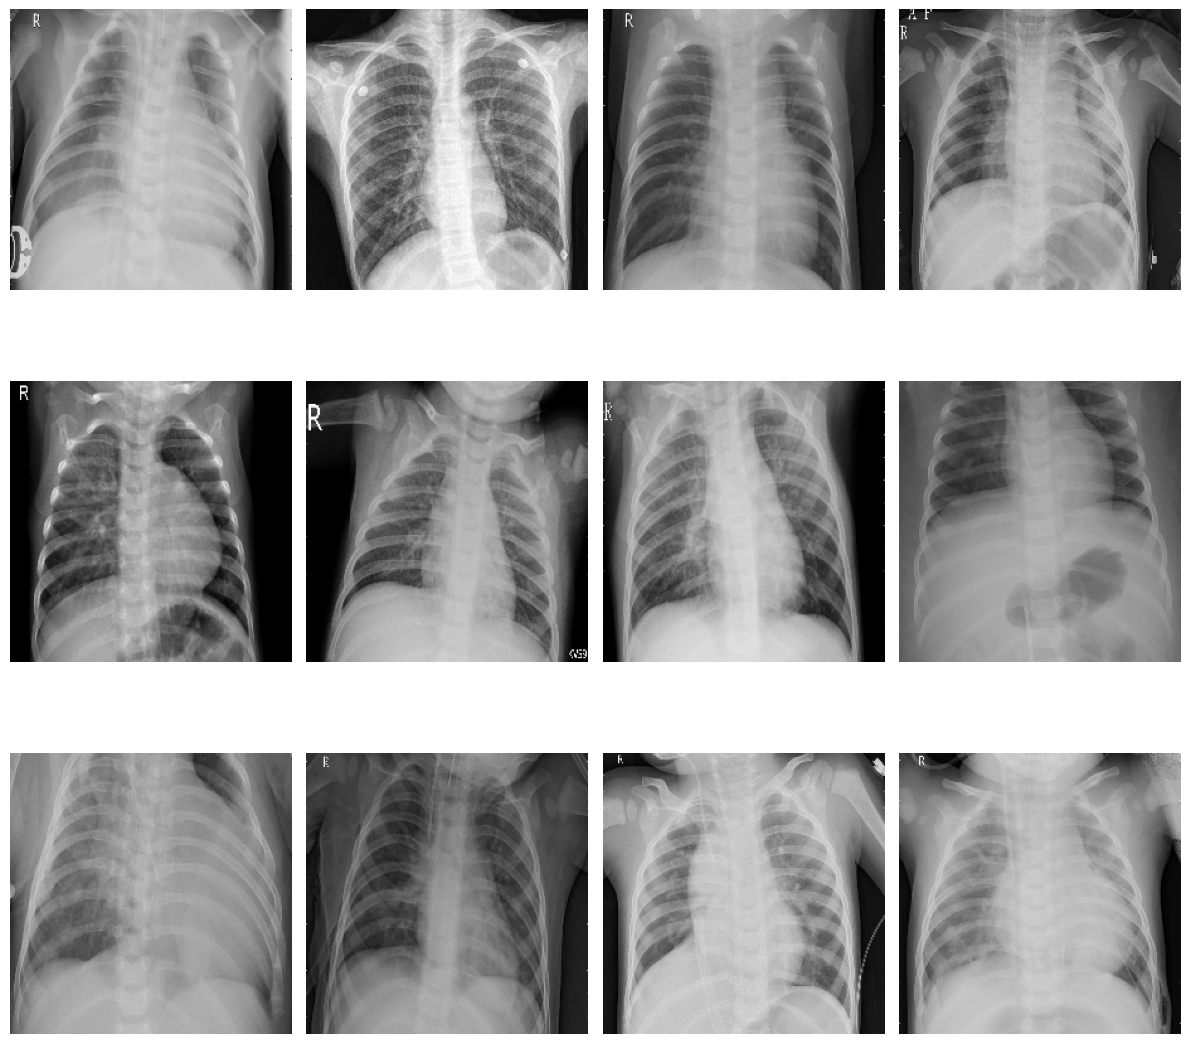

In [14]:
print('Train Set - Pneumonia')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_pneumonia[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Test Set - Normal


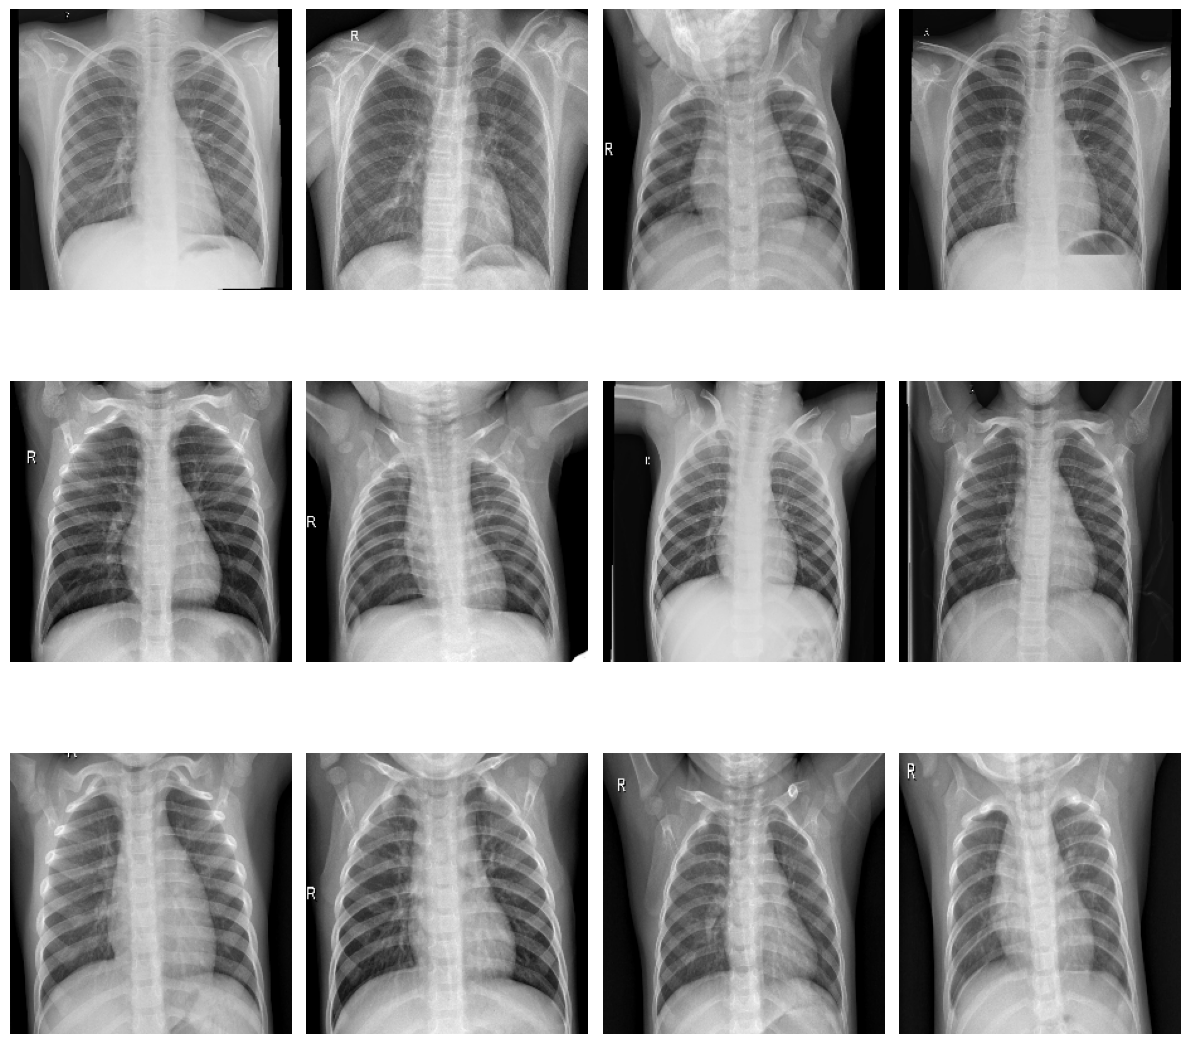

In [15]:
print('Test Set - Normal')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(test_normal[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Test Set - Pneumonia


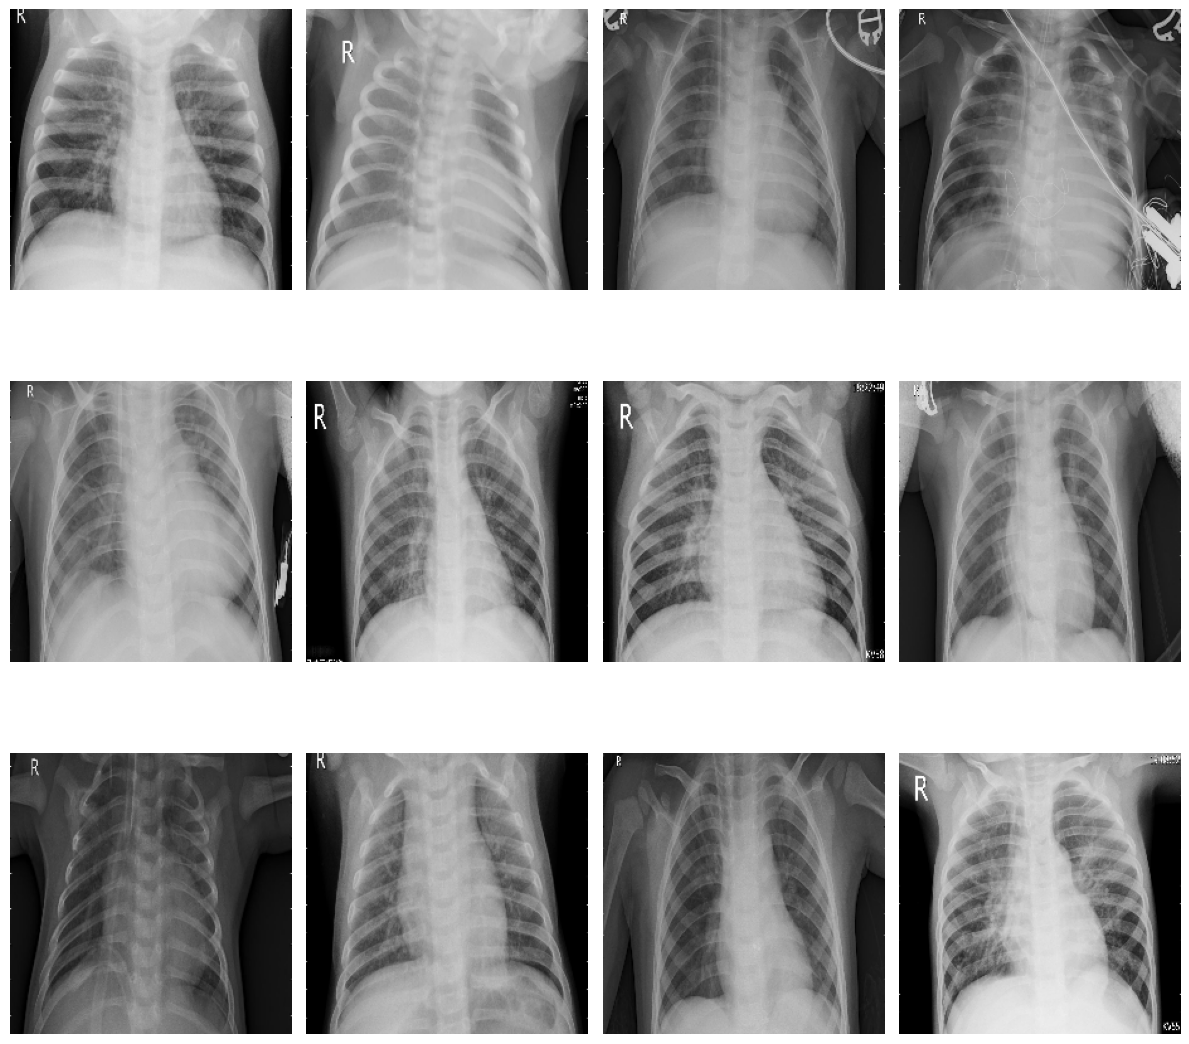

In [16]:
print('Test Set - Pneumonia')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(test_pneumonia[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

First, we need to create a validation set. To do that, we apply a simple stratified split on the original train dataset, using 80% for actual training and 20% for validation purposes.

In [17]:
train_df, val_df = train_test_split(df_train, test_size = 0.20, random_state = SEED, stratify = df_train['class'])

In [18]:
train_df

class  \
3566  Pneumonia   
2866  Pneumonia   
2681  Pneumonia   
1199     Normal   
4619  Pneumonia   
...         ...   
3476  Pneumonia   
678      Normal   
1560  Pneumonia   
2769  Pneumonia   
4881  Pneumonia   

                                                                                         image  
3566     ../input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/VIRUS-2232831-0002.jpeg  
2866  ../input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-3099650-0002.jpeg  
2681  ../input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-5289209-0001.jpeg  
1199       ../input/labeled-chest-xray-images/chest_xray/train/NORMAL/NORMAL-6090737-0001.jpeg  
4619     ../input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/VIRUS-2701747-0002.jpeg  
...                                                                                        ...  
3476  ../input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-1083680-0011.jpeg  
678        ../input/labeled-chest-xray-images/chest_xray/train/NORMAL/NORMAL-9482504-0002.jpeg  
1560     ../input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/VIRUS-6680938-0004.jpeg  
2769  ../input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-9310133-0001.jpeg  
4881  ../input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-7942103-0003.jpeg  

[4185 rows x 2 columns]

In [19]:
val_df

class  \
2945  Pneumonia   
4878  Pneumonia   
3177  Pneumonia   
972      Normal   
3059  Pneumonia   
...         ...   
253      Normal   
4315  Pneumonia   
687      Normal   
3417  Pneumonia   
3745  Pneumonia   

                                                                                         image  
2945  ../input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-7022864-0001.jpeg  
4878  ../input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-9543809-0001.jpeg  
3177  ../input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-4342670-0001.jpeg  
972         ../input/labeled-chest-xray-images/chest_xray/train/NORMAL/NORMAL-137300-0001.jpeg  
3059    ../input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-49691-0001.jpeg  
...                                                                                        ...  
253         ../input/labeled-chest-xray-images/chest_xray/train/NORMAL/NORMAL-388586-0001.jpeg  
4315  ../input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-7338081-0001.jpeg  
687        ../input/labeled-chest-xray-images/chest_xray/train/NORMAL/NORMAL-3271929-0002.jpeg  
3417  ../input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-5701772-0002.jpeg  
3745  ../input/labeled-chest-xray-images/chest_xray/train/PNEUMONIA/BACTERIA-1259378-0001.jpeg  

[1047 rows x 2 columns]

Now, we’re going to load the images from the folders and prepare them to feed our models.

We begin by defining the data generators. With Keras Image Data Generator, we can rescale the pixel values and apply random transformation techniques for data augmentation on the fly. We define two different generators. The val_datagen is used to simply rescale the validation and test sets. The train_datagen includes some transformations to augment the train set.

We apply those generators on each dataset using the flow_from_dataframe method. Apart from the transformations defined in each generator, the images are also resized based on the target_size set.

In [20]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                  zoom_range = 0.1,
                                  #rotation_range = 0.1,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1)

val_datagen = ImageDataGenerator(rescale=1/255.)

ds_train = train_datagen.flow_from_dataframe(train_df,
                                             #directory=train_path, #dataframe contains the full paths
                                             x_col = 'image',
                                             y_col = 'class',
                                             target_size = (IMG_SIZE, IMG_SIZE),
                                             class_mode = 'binary',
                                             batch_size = BATCH,
                                             seed = SEED)

ds_val = val_datagen.flow_from_dataframe(val_df,
                                            #directory=train_path,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'binary',
                                            batch_size = BATCH,
                                            seed = SEED)

ds_test = val_datagen.flow_from_dataframe(df_test,
                                            #directory=test_path,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'binary',
                                            batch_size = 1,
                                            shuffle = False)

Found 4185 validated image filenames belonging to 2 classes.
Found 1047 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


Now, we are ready for the next stage: creating and training the image classification models.


THE CUSTOM CNN MODEL

In [21]:
#Setting callbakcs

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=1e-7,
    restore_best_weights=True,
)

plateau = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor = 0.2,
    patience = 2,
    min_delt = 1e-7,
    cooldown = 0,
    verbose = 1
)

Definition of our first model ‘from scratch’ and see how it performs.

In [22]:
def get_model():

    #Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

    # Block One
    x = layers.Conv2D(filters=16, kernel_size=3, padding='valid')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)

    # Block Two
    x = layers.Conv2D(filters=32, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)

    # Block Three
    x = layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)
    x = layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.4)(x)

    # Head
    #x = layers.BatchNormalization()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)

    model = keras.Model(inputs=[inputs], outputs=output)

    return model

In [23]:
keras.backend.clear_session()

model = get_model()
model.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=3e-5), metrics='binary_accuracy')

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 16)      64        
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 222, 222, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 16)      0     

In [24]:
history = model.fit(ds_train,
          batch_size = BATCH, epochs = 50,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));

Epoch 1/50
130/130 [==============================] - 107s 761ms/step - loss: 0.4776 - binary_accuracy: 0.7845 - val_loss: 1.0666 - val_binary_accuracy: 0.7421 - lr: 3.0000e-05
Epoch 2/50
130/130 [==============================] - 112s 856ms/step - loss: 0.3141 - binary_accuracy: 0.8595 - val_loss: 1.9013 - val_binary_accuracy: 0.7421 - lr: 3.0000e-05
Epoch 3/50
131/130 [==============================] - ETA: 0s - loss: 0.2476 - binary_accuracy: 0.8951
Epoch 3: ReduceLROnPlateau reducing learning rate to 5.9999998484272515e-06.
130/130 [==============================] - 100s 762ms/step - loss: 0.2476 - binary_accuracy: 0.8951 - val_loss: 1.6636 - val_binary_accuracy: 0.7421 - lr: 3.0000e-05
Epoch 4/50
130/130 [==============================] - 101s 776ms/step - loss: 0.2211 - binary_accuracy: 0.9109 - val_loss: 1.1454 - val_binary_accuracy: 0.7421 - lr: 6.0000e-06
Epoch 5/50
130/130 [==============================] - 98s 746ms/step - loss: 0.2205 - binary_accuracy: 0.9149 - val_loss: 0

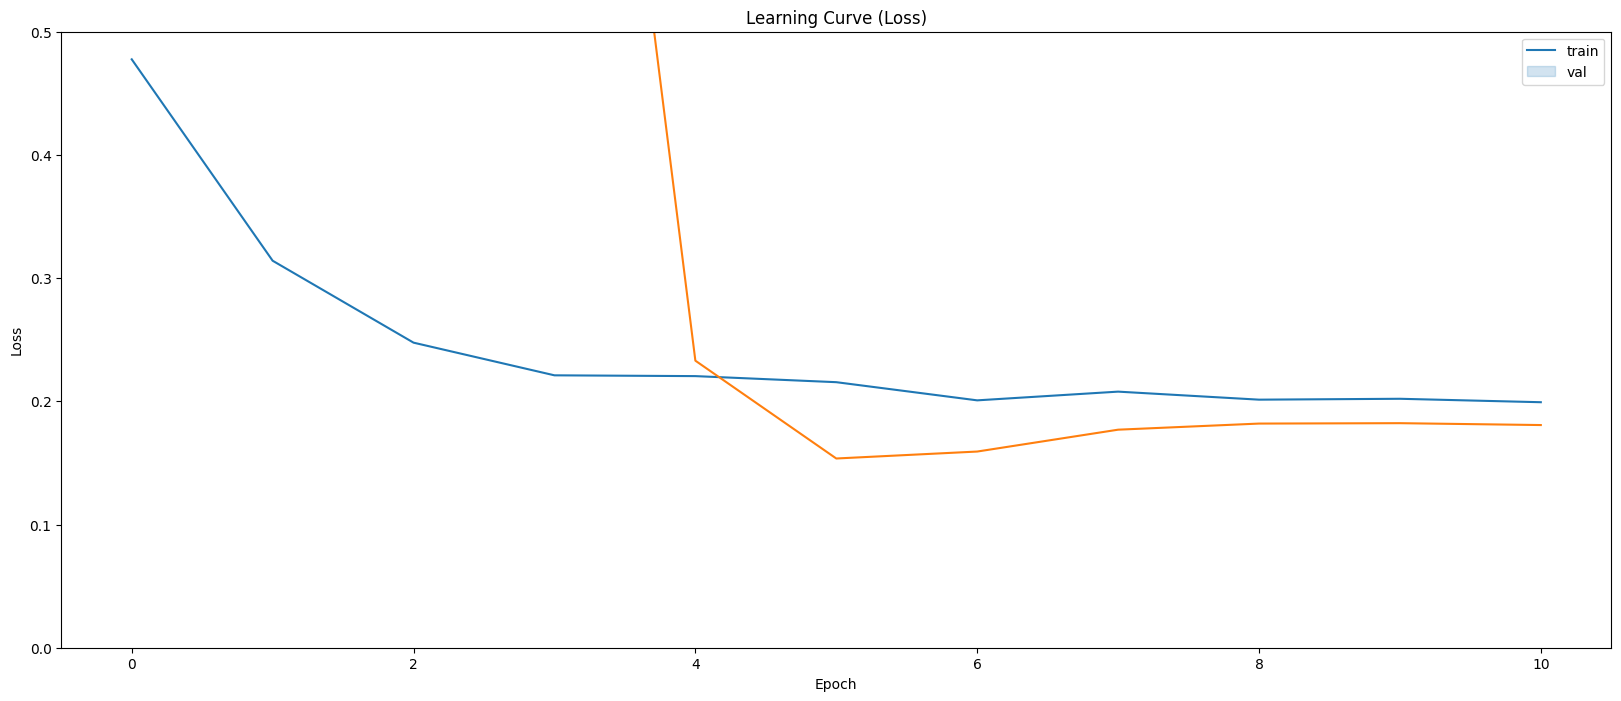

In [25]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.5)
ax.legend(['train', 'val'], loc='best')
plt.show()

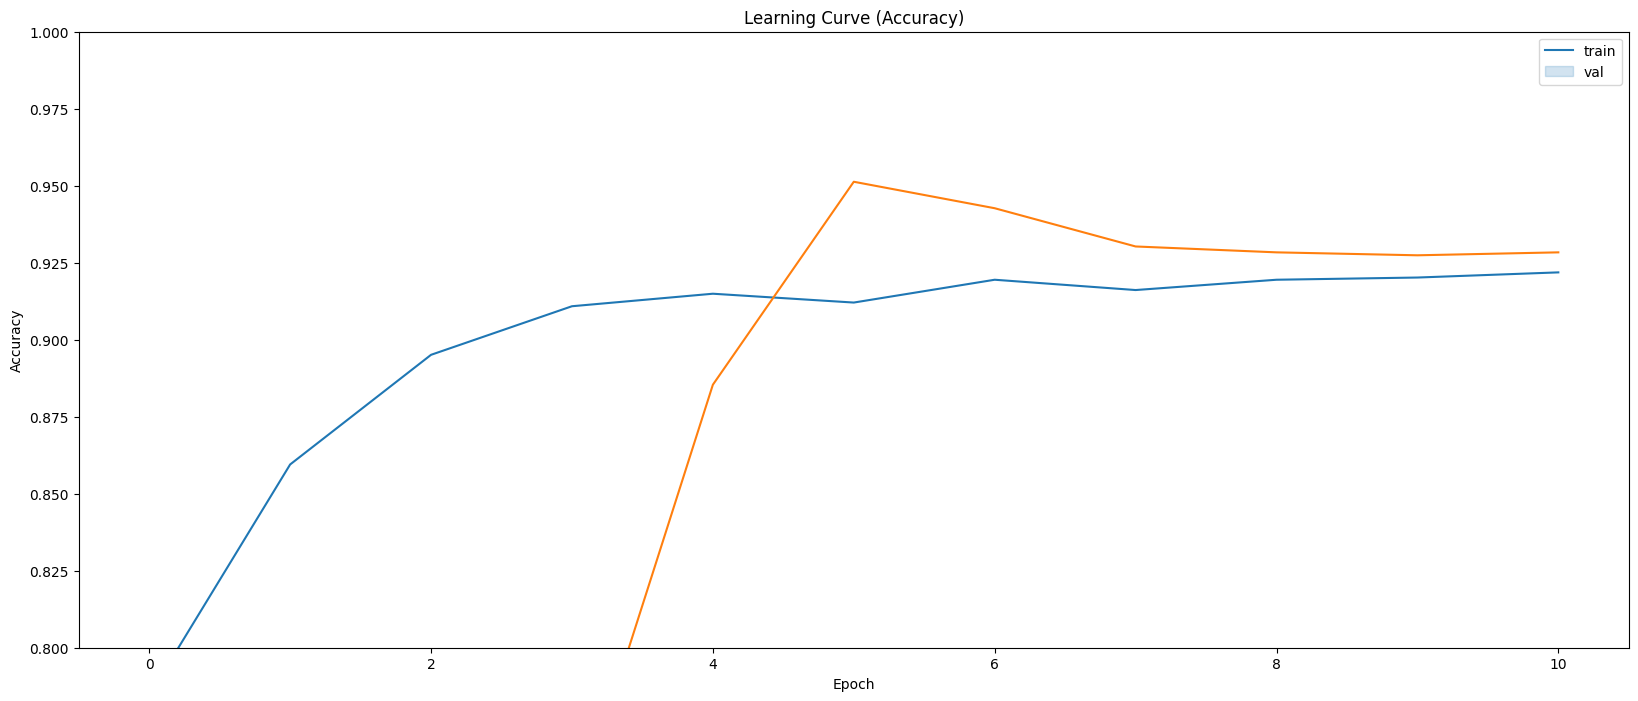

In [26]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['binary_accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_binary_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.80, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [27]:
score = model.evaluate(ds_val, steps = len(val_df)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.15359492599964142
Val accuracy: 0.9512894153594971


In [28]:
score = model.evaluate(ds_test, steps = len(df_test), verbose = 0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.31562119722366333
Test accuracy: 0.8669871687889099


The second approach, called transfer learning, consists of using a pretrained model as a feature extractor. In this notebook, the selected model was the ResNet152V2 available on the Keras Package.

This model was already trained in another dataset (ImageNet). What we do here is to set include_top to false, removing the ‘head’, responsible for assigning the classes in this other dataset, and keep all the previous layers. Then, we include our last few layers, including the one responsible for generating the output.

In [29]:
base_model = tf.keras.applications.ResNet152V2(
    weights='imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False)

base_model.trainable = False

def get_pretrained():

    #Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

    x = base_model(inputs)

    # Head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.1)(x)

    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)

    model = keras.Model(inputs=[inputs], outputs=output)

    return model

234545216/234545216 [==============================] - 11s 0us/step


In [30]:
keras.backend.clear_session()

model_pretrained = get_pretrained()
model_pretrained.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=5e-5), metrics='binary_accuracy')

model_pretrained.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             

In [ ]:
history = model_pretrained.fit(ds_train,
          batch_size = BATCH, epochs = 50,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));

Epoch 1/50
130/130 [==============================] - 141s 1000ms/step - loss: 0.3585 - binary_accuracy: 0.8406 - val_loss: 0.2224 - val_binary_accuracy: 0.9150 - lr: 5.0000e-05
Epoch 2/50
130/130 [==============================] - 125s 957ms/step - loss: 0.1868 - binary_accuracy: 0.9314 - val_loss: 0.1765 - val_binary_accuracy: 0.9312 - lr: 5.0000e-05
Epoch 3/50
130/130 [==============================] - 122s 931ms/step - loss: 0.1671 - binary_accuracy: 0.9357 - val_loss: 0.1489 - val_binary_accuracy: 0.9436 - lr: 5.0000e-05
Epoch 4/50
130/130 [==============================] - 129s 990ms/step - loss: 0.1489 - binary_accuracy: 0.9460 - val_loss: 0.1356 - val_binary_accuracy: 0.9522 - lr: 5.0000e-05
Epoch 5/50
130/130 [==============================] - 126s 967ms/step - loss: 0.1379 - binary_accuracy: 0.9505 - val_loss: 0.1240 - val_binary_accuracy: 0.9561 - lr: 5.0000e-05
Epoch 6/50
130/130 [==============================] - 122s 933ms/step - loss: 0.1334 - binary_accuracy: 0.9503 - v

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.5)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['binary_accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_binary_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.80, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [ ]:
score = model_pretrained.evaluate(ds_val, steps = len(val_df)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

In [ ]:
score = model_pretrained.evaluate(ds_test, steps = len(df_test), verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Our last approach is called Fine Tuning. In the last section, all the layers from the pretrained model were ‘frozen’, preserving the weights calculated during its training on the ImageNet dataset. Now, we are going to unfreeze a few of its last layers and continue the training, tuning the weights from these layers according to our dataset.

In [ ]:
base_model.trainable = True

# Freeze all layers except for the
for layer in base_model.layers[:-13]:
    layer.trainable = False

In [ ]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name, layer.trainable)

In [ ]:
model_pretrained.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=2e-6), metrics='binary_accuracy')

model_pretrained.summary()

In [ ]:
history = model_pretrained.fit(ds_train,
          batch_size = BATCH, epochs = 50,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.3)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['binary_accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_binary_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.90, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [ ]:
score = model_pretrained.evaluate(ds_val, steps = len(val_df)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

In [ ]:
score = model_pretrained.evaluate(ds_test, steps = len(df_test), verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

PERFORMANCE METRICS

In [ ]:
num_label = {'Normal': 0, 'Pneumonia' : 1}
Y_test = df_test['class'].copy().map(num_label).astype('int')

In [ ]:
ds_test.reset()
predictions = model_pretrained.predict(ds_test, steps=len(ds_test), verbose=0)
pred_labels= np.where(predictions>0.5, 1, 0)

In [ ]:
print("Test Accuracy: ", accuracy_score(Y_test, pred_labels))

In [ ]:
confusion_matrix = metrics.confusion_matrix(Y_test, pred_labels)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [ ]:
print(metrics.classification_report(Y_test, pred_labels, labels = [0, 1]))

In [ ]:
roc_auc = metrics.roc_auc_score(Y_test, predictions)
print('ROC_AUC: ', roc_auc)

fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions)

plt.plot(fpr, tpr, label = 'ROC_AUC = %0.3f' % roc_auc)

plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend(loc="lower right")

plt.show()